# Medical Insurance Cost Prediction

- 'Medical Insurance Cost Prediction', involves developing a model to predict the cost of medical insurance based on a set of input features such as age, gender, BMI, smoking status, and region. The goal of this project is to help insurance companies and policyholders make better decisions regarding insurance policies and premiums.

- To accomplish this, I needed to perform data cleaning and preprocessing to ensure that the data is in a usable format for machine learning models. Performed some exploratory data analysis to gain insights into the relationships between the input features and the target variable (charges).

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Analysis

In [3]:
df = pd.read_csv('E:\ML_Projects_New\Medical Insuarance Cost Prediction\insurance.csv')

In [5]:
#first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#last five rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
#checking for the count of rows and columns 
df.shape

(1338, 7)

Dataframe has 1338 rows and 7 columns

In [8]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features
- Sex
- Smoker
- Region

In [9]:
#checking for null values in the dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataframe has no null values

In [12]:
#Checking for the duplicate values
df.duplicated(keep='last').value_counts()

False    1337
True        1
dtype: int64

There is a duplicate value

In [16]:
#dropping the duplicated value
df.drop_duplicates(keep=False, inplace=True)

In [17]:
#Rechecking for the drop duplicate
df.shape

(1336, 7)

# Data Analysis

In [18]:
#statistical measures for the dataset
df.describe()

,age,bmi,children,charges
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,30.663507,1.096557,13287.833731
std,14.038678,6.102752,1.205650,12110.702320
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4746.875675
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.700000,2.000000,16687.364100
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


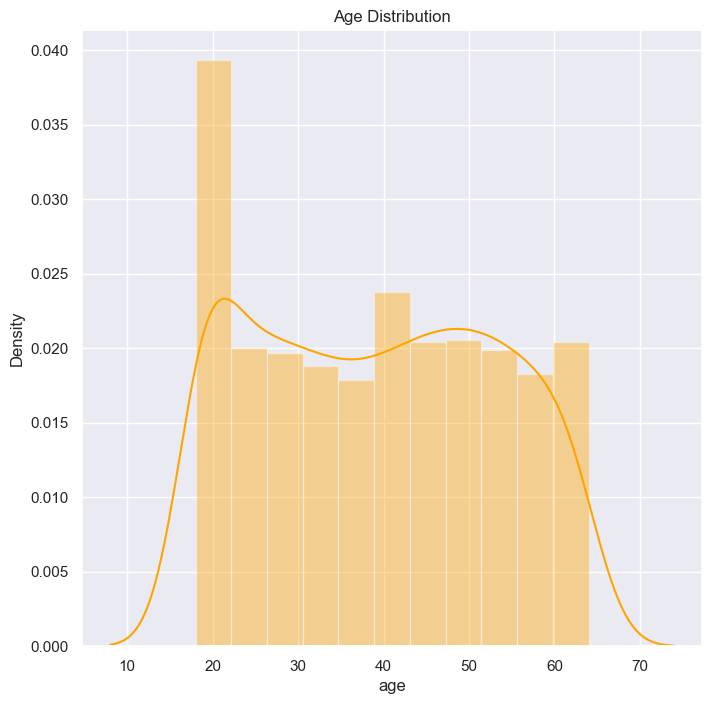

In [20]:
#distribution of age value
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['age'], color='orange')
plt.title('Age Distribution')
plt.show()

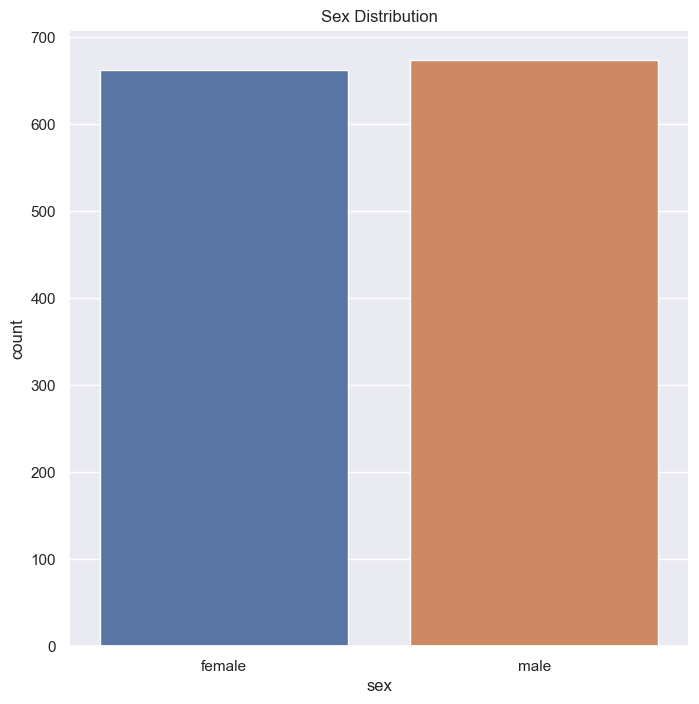

In [21]:
#Gender column
plt.figure(figsize=(8,8))
sns.countplot(x='sex', data= df)
plt.title('Sex Distribution')
plt.show()

In [22]:
df['sex'].value_counts()

male      674
female    662
Name: sex, dtype: int64

C:\Users\Nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


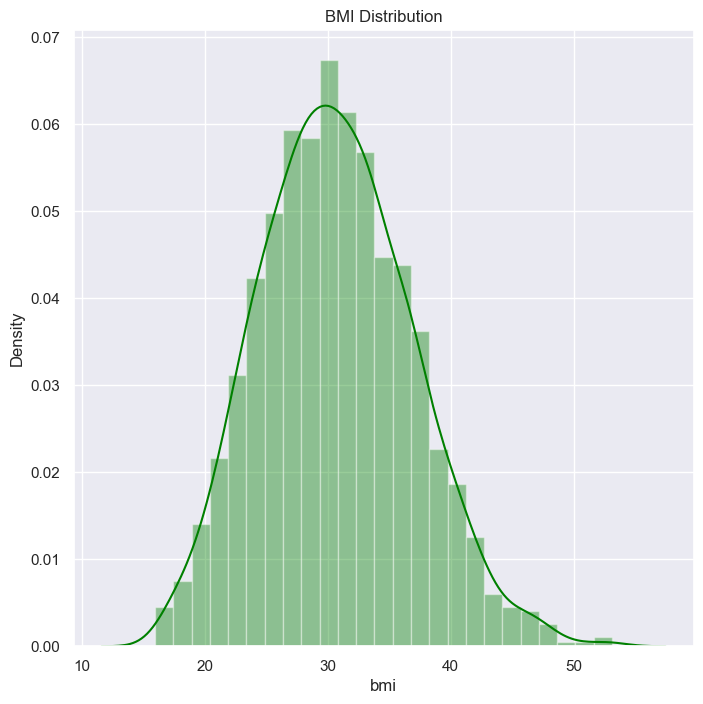

In [23]:
#bmi distribution
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'], color='green')
plt.title('BMI Distribution')
plt.show()

Normal bmi range is 18.5 - 24.9

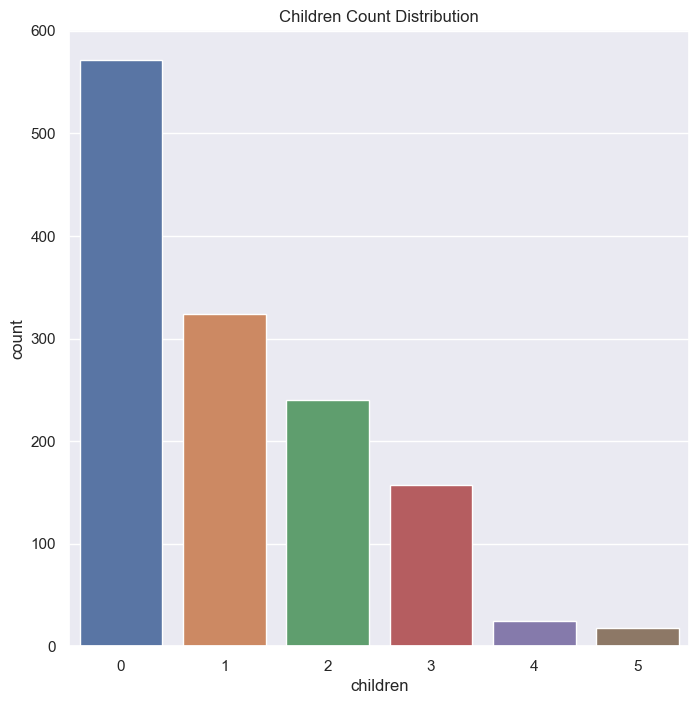

In [25]:
#children field distribution
plt.figure(figsize=(8,8))
sns.countplot(x='children', data=df)
plt.title('Children Count Distribution')
plt.show()

In [26]:
df['children'].value_counts()

0    572
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

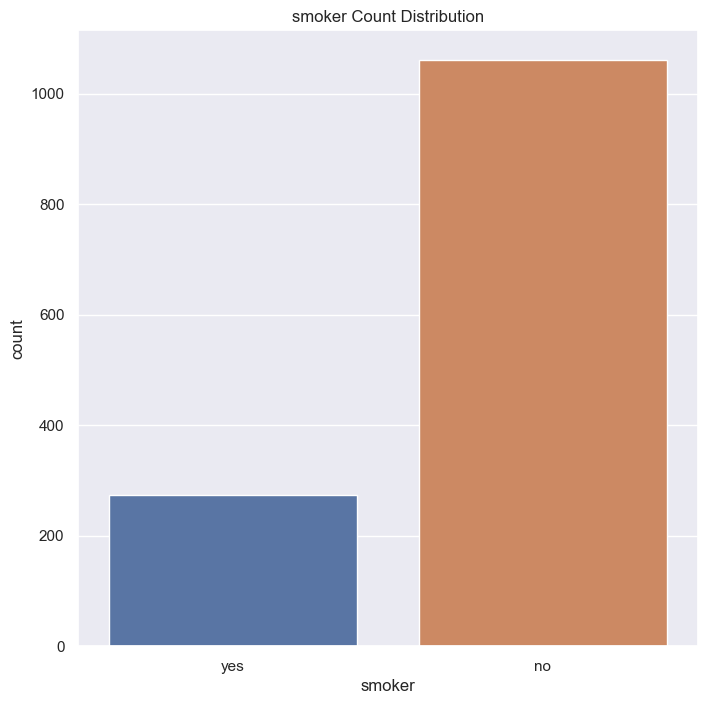

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=df)
plt.title('smoker Count Distribution')
plt.show()

In [29]:
df['smoker'].value_counts()

no     1062
yes     274
Name: smoker, dtype: int64

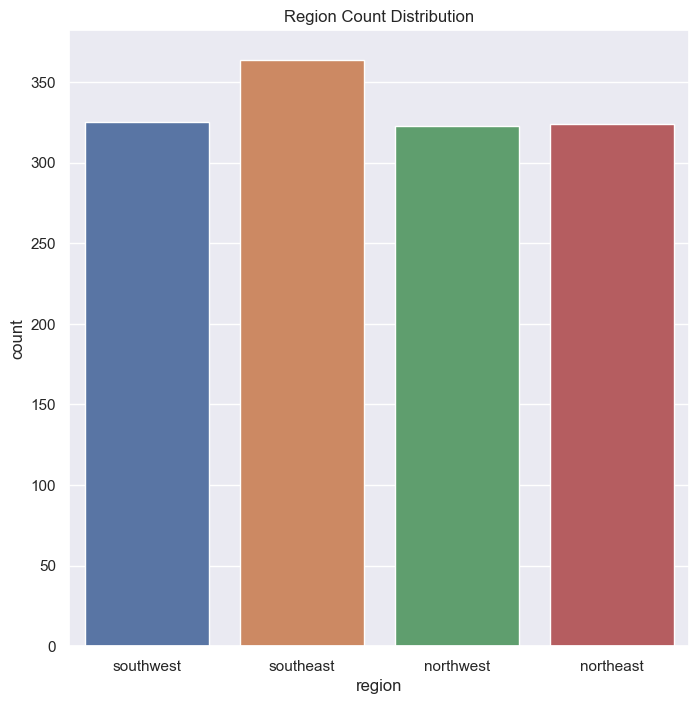

In [30]:
#region field distribution
plt.figure(figsize=(8,8))
sns.countplot(x='region', data=df)
plt.title('Region Count Distribution')
plt.show()

In [31]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    323
Name: region, dtype: int64

C:\Users\Nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


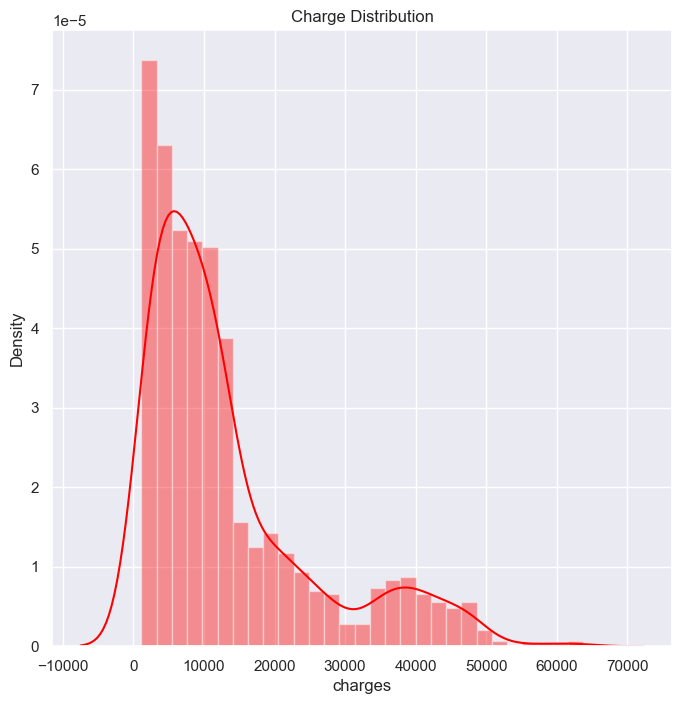

In [32]:
#charges distribution
plt.figure(figsize=(8,8))
sns.distplot(df['charges'], color='red')
plt.title('Charge Distribution')
plt.show()

# Data Pre-Processing

# Encoding the Categorical Features

In [33]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [34]:
#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [35]:
#encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast': 2, 'northwest':3}}, inplace=True)

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting the Features and Target

In [37]:
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [38]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1336 rows x 6 columns]


In [39]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1336, dtype: float64


# Splitting the Data into Training Data and Testing Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Training

In [41]:
#Loading the Linear Regression Model
lin_reg = LinearRegression()

In [42]:
lin_reg.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [44]:
y_pred = lin_reg.predict(X_test)

In [45]:
#R squared Value
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.7354888798598069


In [50]:
#Building a Predictive System
input_data = (31,1,25.74,0,1,0)

#changing input data into numpy array
inp_numpy = np.array(input_data)

#reshape the array
input_data_reshape = inp_numpy.reshape(1,-1)

#predicting the input data
pred = lin_reg.predict(input_data_reshape)

print(f'The insurance cost is USD {pred[0].round(2)}')

The insurance cost is USD 3705.47


C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
